## Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
# Dark mode for life!!!
plt.style.use ('dark_background')

## Path

In [3]:
img_path = '../Images/'

## Channels

In [4]:
# Read the image and split it corresponding channels
img = cv2.imread (f'{img_path}/1.jpg')
img = img [..., ::-1]

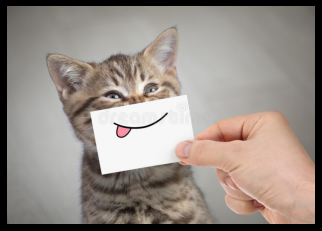

In [5]:
plt.imshow (img); plt.axis ('off');

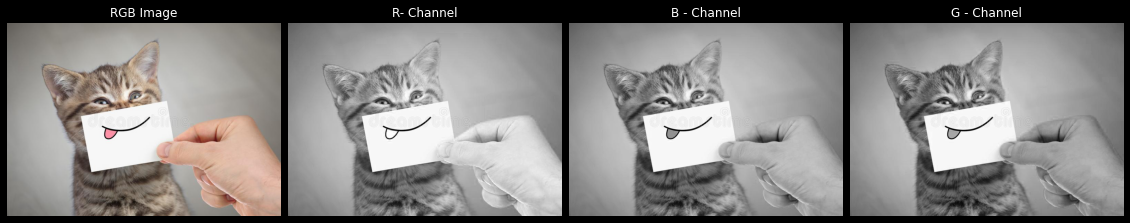

In [6]:
fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(1, 4),
                 axes_pad=0.1,)

for i, (ax, im) in enumerate (zip (grid, [img, img [...,0], img [...,1], img [...,2]])):
    ax.imshow (im, cmap='gray')
    ax.set_title (['RGB Image', 'R- Channel', 'B - Channel', 'G - Channel'] [i])
    ax.axis ('off')

In [7]:
img = plt.imread (f'{img_path}/2.webp')
img.shape

(280, 433, 3)

In [8]:
# Crop the lower part (logo)
img = img [:-15]

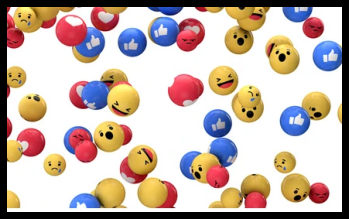

In [9]:
plt.imshow (img); plt.axis ('off');

In [10]:
# Lets try to extract the object
# Perhaps clustring could seperate out the red, yellow and blue blob? & background??
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans (n_clusters=6)

In [12]:
X = cv2.cvtColor (img, cv2.COLOR_RGB2HSV).reshape (-1, 3)
kmeans.fit (X)

KMeans(n_clusters=6)

In [13]:
kmeans.labels_.shape, X.shape

((114745,), (114745, 3))

In [14]:
list (zip (X, kmeans.labels_))

[(array([  1, 206, 186], dtype=uint8), 3),
 (array([  0, 202, 192], dtype=uint8), 3),
 (array([  0, 195, 200], dtype=uint8), 3),
 (array([179, 214, 148], dtype=uint8), 5),
 (array([176,  85, 201], dtype=uint8), 0),
 (array([150,   7, 255], dtype=uint8), 0),
 (array([155,  11, 255], dtype=uint8), 0),
 (array([  0,   0, 255], dtype=uint8), 2),
 (array([ 30,   5, 255], dtype=uint8), 2),
 (array([ 33,   9, 255], dtype=uint8), 2),
 (array([ 60,   3, 255], dtype=uint8), 2),
 (array([ 30,   4, 255], dtype=uint8), 2),
 (array([ 22,  19, 254], dtype=uint8), 2),
 (array([ 29,  35, 255], dtype=uint8), 2),
 (array([ 20, 105, 255], dtype=uint8), 3),
 (array([ 20, 147, 248], dtype=uint8), 3),
 (array([ 23, 154, 247], dtype=uint8), 3),
 (array([ 25, 156, 247], dtype=uint8), 3),
 (array([ 26, 148, 250], dtype=uint8), 3),
 (array([ 27, 139, 251], dtype=uint8), 3),
 (array([ 28, 130, 255], dtype=uint8), 3),
 (array([ 30, 124, 251], dtype=uint8), 3),
 (array([ 31, 122, 251], dtype=uint8), 3),
 (array([ 3

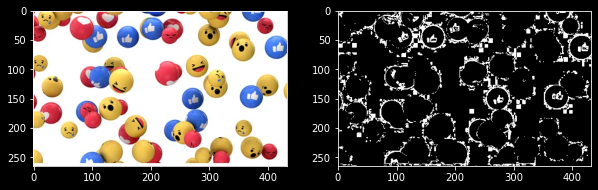

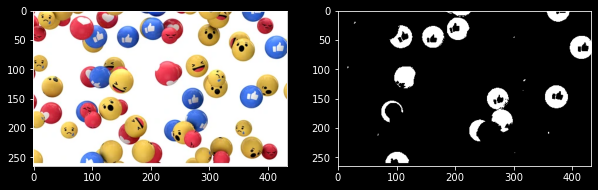

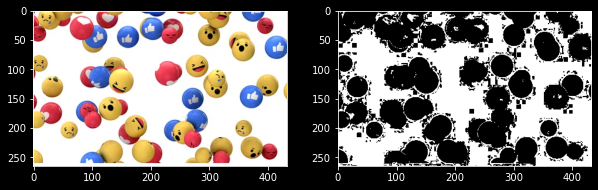

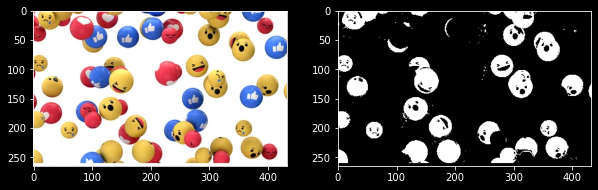

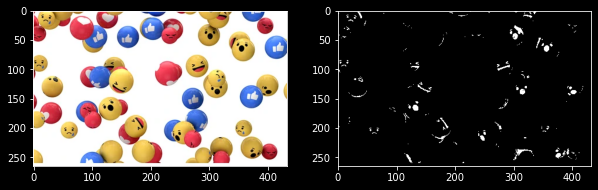

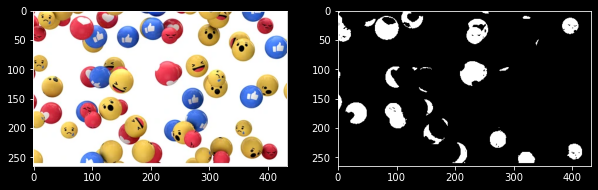

In [19]:
masks = []
for i in range (kmeans.n_clusters):
    segmented_img = np.zeros (img.shape [:-1], dtype=np.uint8)
    segmented_img.reshape (-1, 1) [np.where (kmeans.labels_ == i)] = 255
    
    plt.figure (figsize=(10, 10))
    plt.subplot (121)
    plt.imshow (img)
    plt.subplot (122)
    plt.imshow (segmented_img, cmap='gray')
    plt.show ()
    
    if i in [1, 3, 5]:
        masks.append (segmented_img)

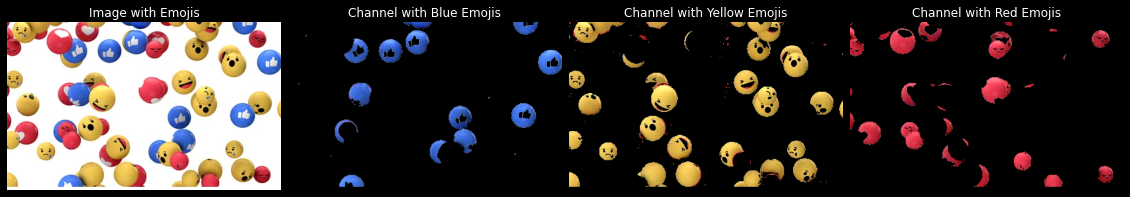

In [20]:
fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(1, 4),
                 axes_pad=0.1,)

for i, (ax, im) in enumerate (zip (grid, [img, img [...,0], img [...,1], img [...,2]])):
    if i != 0:
        im = cv2.bitwise_and (img, img, mask=masks [i-1])
    
    ax.imshow (im, cmap='gray')
    ax.set_title (['Image with Emojis', 'Channel with Blue Emojis', 'Channel with Yellow Emojis', 'Channel with Red Emojis'] [i])
    ax.axis ('off')

## Kernels

In [21]:
# Lets define a vertical edge detector and a horizontal edge detector
vertical_kernel = np.array ([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

horizontal_kernel = np.array ([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

In [22]:
# Read the image
img = cv2.imread (f'{img_path}/lion.jpg')
img.shape

(680, 1020, 3)

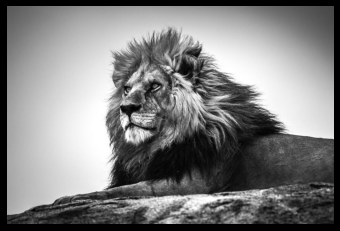

In [23]:
plt.imshow (img); plt.axis ('off');

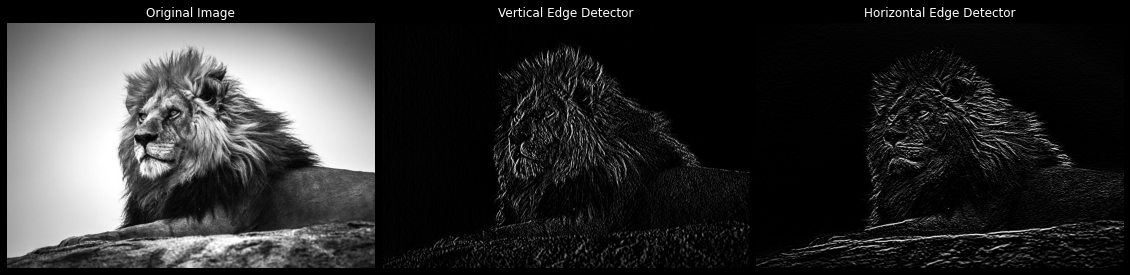

In [24]:
# Apply the vertical filter & horizonatal filter
fig = plt.figure(figsize=(20, 30))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(1, 3),
                 axes_pad=0.1,)


for i, (ax, im) in enumerate (zip (grid, [img, 
                          cv2.filter2D (img, -1, vertical_kernel), 
                          cv2.filter2D (img, -1, horizontal_kernel)])):
    ax.imshow (im)
    ax.axis ('off')
    ax.set_title (['Original Image', 'Vertical Edge Detector', 'Horizontal Edge Detector'] [i])

In [25]:
import seaborn as sns

/home/scoo/anaconda3/envs/vision/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  from ipykernel import kernelapp as app


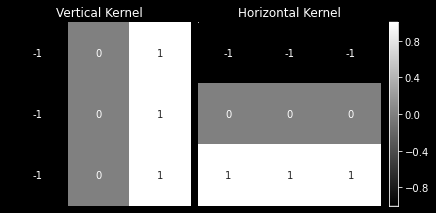

In [44]:
fig = plt.figure(figsize=(7, 15))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(1, 2),
                 axes_pad=0.1, cbar_mode='single')

for i, (ax, kernel) in enumerate (zip (grid, [vertical_kernel, horizontal_kernel])):
    sns.heatmap (kernel, 
                 cmap='gray', 
                 annot=True, 
                 cbar=False,
                 ax=ax)
    ax.axis ('off');
    ax.set_title (['Vertical Kernel', 'Horizontal Kernel'] [i])
    
grid.cbar_axes[0].colorbar(ax.hexbin(range (-1, 1), range (-1, 1), cmap='gray', vmin=-1, vmax=1));

## Operations to reach 1x1

In [59]:
i = 0
c = 0
while i <= 199:
    c += 1
    end='; ' if c % 3 != 0 else '\n'
    print (f'{199-i}x{199-i} -> {199-(i+2)}x{199-(i+2)}', 
           end=end)
    i += 2

199x199 -> 197x197; 197x197 -> 195x195; 195x195 -> 193x193
193x193 -> 191x191; 191x191 -> 189x189; 189x189 -> 187x187
187x187 -> 185x185; 185x185 -> 183x183; 183x183 -> 181x181
181x181 -> 179x179; 179x179 -> 177x177; 177x177 -> 175x175
175x175 -> 173x173; 173x173 -> 171x171; 171x171 -> 169x169
169x169 -> 167x167; 167x167 -> 165x165; 165x165 -> 163x163
163x163 -> 161x161; 161x161 -> 159x159; 159x159 -> 157x157
157x157 -> 155x155; 155x155 -> 153x153; 153x153 -> 151x151
151x151 -> 149x149; 149x149 -> 147x147; 147x147 -> 145x145
145x145 -> 143x143; 143x143 -> 141x141; 141x141 -> 139x139
139x139 -> 137x137; 137x137 -> 135x135; 135x135 -> 133x133
133x133 -> 131x131; 131x131 -> 129x129; 129x129 -> 127x127
127x127 -> 125x125; 125x125 -> 123x123; 123x123 -> 121x121
121x121 -> 119x119; 119x119 -> 117x117; 117x117 -> 115x115
115x115 -> 113x113; 113x113 -> 111x111; 111x111 -> 109x109
109x109 -> 107x107; 107x107 -> 105x105; 105x105 -> 103x103
103x103 -> 101x101; 101x101 -> 99x99; 99x99 -> 97x97
97x

In [53]:
print (c)

100


## Capstone - Prework

### Exctract the URLs using BeautifulSoup
https://www.crummy.com/software/BeautifulSoup/bs4/doc

In [8]:
from bs4 import BeautifulSoup

In [9]:
html = open ('excavator_large_all.txt', 'r').read ()

In [10]:
len (html)

1521759

In [11]:
parsed = BeautifulSoup (html, 'html.parser')

In [12]:
list_of_urls = []
with open ('excavator_url.txt', 'w+') as fh:
    for ele in parsed.find_all ('a', href=True):
        if '/search' in ele ['href']:
            continue
        if '/imgres' in ele ['href']:
            print (ele ['href'])
            list_of_urls.append (ele ['href'])
            fh.write (ele ['href']+'\n')

/imgres?imgurl=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2F9%2F92%2FThe_man_who_operate_the_Excavator.jpg&imgrefurl=https%3A%2F%2Fcommons.wikimedia.org%2Fwiki%2FFile%3AThe_man_who_operate_the_Excavator.jpg&tbnid=QJ3haw-hlAM7VM&vet=12ahUKEwjUuuzykcfxAhUtgksFHeQrDdwQMygAegUIARCBAg..i&docid=GrDqUXpygTcKpM&w=4608&h=2592&q=excavator&safe=images&client=ubuntu&ved=2ahUKEwjUuuzykcfxAhUtgksFHeQrDdwQMygAegUIARCBAg
/imgres?imgurl=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2F8%2F8c%2FCAT_320.excavator.jpg&imgrefurl=https%3A%2F%2Fcommons.wikimedia.org%2Fwiki%2FFile%3ACAT_320.excavator.jpg&tbnid=AfNreTPNHGNEJM&vet=12ahUKEwjUuuzykcfxAhUtgksFHeQrDdwQMygBegUIARCEAg..i&docid=BZbou3Mar38wSM&w=3872&h=2592&q=excavator&safe=images&client=ubuntu&ved=2ahUKEwjUuuzykcfxAhUtgksFHeQrDdwQMygBegUIARCEAg
/imgres?imgurl=https%3A%2F%2Fp2.piqsels.com%2Fpreview%2F139%2F323%2F656%2Fexcavators-blade-construction-machine-backhoe-bucket.jpg&imgrefurl=https%3A%2F%2Fwww.piqsels.com%2Fen%2Fpublic-d

In [13]:
len (list_of_urls)

269

In [15]:
import time
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i, url in enumerate (list_of_urls [130:], start=1):
    i = i+130
    # Get the content
    content = requests.get ('https://www.google.com'+url).text
    
    # Extract it
    c = BeautifulSoup (content, 'html.parser')

    for ele in c.find_all ('img'):
        if 'http' in ele ['src']:
            url = ele ['src']
            print (url)
            extension = url.split ('.') [-1]
            #img = plt.imread (ele ['src'], format=extension)
            #mpimg.imsave (f'./excavators/img_{i:03d}.{extension}', img)
            fname = f'img_{i:03d}.{extension}'
            !wget {url} -O ./excavators/{fname}
    time.sleep (10)
    
    print ('\n\n')

https://upload.wikimedia.org/wikipedia/commons/c/c5/Tveks_EK-12_excavator.jpg
--2021-07-07 00:34:37--  https://upload.wikimedia.org/wikipedia/commons/c/c5/Tveks_EK-12_excavator.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 997426 (974K) [image/jpeg]
Saving to: ‘./excavators/img_131.jpg’

./excavators/img_13 100%[===================>] 974.05K   962KB/s    in 1.0s    

2021-07-07 00:34:39 (962 KB/s) - ‘./excavators/img_131.jpg’ saved [997426/997426]




https://cdn.pixabay.com/photo/2021/03/29/07/37/excavator-6133256_1280.png
--2021-07-07 00:34:49--  https://cdn.pixabay.com/photo/2021/03/29/07/37/excavator-6133256_1280.png
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.20.183, 104.18.21.183, 2606:4700::6812:14b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.20.183|:4

In [6]:
import cv2
import glob
import matplotlib.image as mpimg

In [7]:
for fname in sorted (glob.glob ('./excavators/*.*')) [58:]:
    img = cv2.imread (fname)
    if img.shape [0] <= 1280 or img.shape [1] <= 1280:
        # Don't resize
        mpimg.imsave (f'./excavators/resized/{fname.split ("/")[-1]}', img [...,::-1])
        
    elif img.shape [0] <= 2500 or img.shape [1] <= 2500:
        # Resize by 0.3
        resized_img = cv2.resize (img, None, fx=0.35, fy=0.35, interpolation=cv2.INTER_AREA)
        print ('Resize 0.35', img.shape, resized_img.shape)
        mpimg.imsave (f'./excavators/resized/{fname.split ("/")[-1]}', resized_img [...,::-1])
       
    elif img.shape [0] >= 4000 and img.shape [1] >= 4000:
        # Resize by 0.2
        resized_img = cv2.resize (img, None, fx=0.2, fy=0.2, interpolation=cv2.INTER_AREA)
        print ('Resize 0.2', img.shape, resized_img.shape)
        mpimg.imsave (f'./excavators/resized/{fname.split ("/")[-1]}', resized_img [...,::-1])
        
    else:
        # Resize by 0.25
        resized_img = cv2.resize (img, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_AREA)
        print ('Resize 0.25', img.shape, resized_img.shape)
        mpimg.imsave (f'./excavators/resized/{fname.split ("/")[-1]}', resized_img [...,::-1])

Resize 0.25 (3446, 5169, 3) (862, 1292, 3)
Resize 0.25 (2592, 4201, 3) (648, 1050, 3)
Resize 0.35 (1888, 3176, 3) (661, 1112, 3)
Resize 0.25 (2937, 4435, 3) (734, 1109, 3)
Resize 0.35 (2200, 3300, 3) (770, 1155, 3)
Resize 0.25 (2960, 3845, 3) (740, 961, 3)
Resize 0.35 (1800, 2707, 3) (630, 947, 3)
Resize 0.35 (1532, 2720, 3) (536, 952, 3)
Resize 0.35 (1334, 1998, 3) (467, 699, 3)
Resize 0.35 (1345, 2560, 3) (471, 896, 3)
Resize 0.35 (1952, 3896, 3) (683, 1364, 3)
Resize 0.25 (3129, 4608, 3) (782, 1152, 3)
Resize 0.25 (2937, 4435, 3) (734, 1109, 3)
Resize 0.25 (3672, 4896, 3) (918, 1224, 3)
Resize 0.25 (2988, 5312, 3) (747, 1328, 3)
Resize 0.25 (3456, 4608, 3) (864, 1152, 3)
Resize 0.25 (2991, 3900, 3) (748, 975, 3)
Resize 0.25 (3278, 4371, 3) (820, 1093, 3)
Resize 0.25 (2599, 4844, 3) (650, 1211, 3)
Resize 0.35 (1936, 2592, 3) (678, 907, 3)
Resize 0.2 (4000, 6000, 3) (800, 1200, 3)
Resize 0.25 (2848, 4272, 3) (712, 1068, 3)
Resize 0.35 (1296, 2300, 3) (454, 805, 3)
Resize 0.25 (3672, 4

### Trying with `icrawler`
https://icrawler.readthedocs.io/en/latest/builtin.html

In [1]:
from icrawler.builtin import GoogleImageCrawler

In [2]:
google_crawler = GoogleImageCrawler(
    feeder_threads=1,
    parser_threads=1,
    downloader_threads=4,
    storage={'root_dir': './excavators'})

filters = dict(
    size='large',
    #color='orange',
    license='commercial,modify',
    #date=((2017, 1, 1), (2017, 11, 30))
)

In [6]:
google_crawler.crawl(keyword='excavators', filters=filters, offset=0, max_num=50,
                     max_size=None, file_idx_offset=0)

2021-06-30 09:04:14,603 - INFO - icrawler.crawler - start crawling...
2021-06-30 09:04:14,604 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-06-30 09:04:14,605 - INFO - feeder - thread feeder-001 exit
2021-06-30 09:04:14,605 - INFO - icrawler.crawler - starting 1 parser threads...
2021-06-30 09:04:14,608 - INFO - icrawler.crawler - starting 4 downloader threads...
2021-06-30 09:04:15,966 - INFO - parser - parsing result page https://www.google.com/search?q=excavators&ijn=0&start=0&tbs=isz%3Al%2Csur%3Afmc&tbm=isch
2021-06-30 09:04:16,435 - ERROR - downloader - Response status code 404, file https://encrypted-tbn0.gstatic.com/images?q\u003dtbn:ANd9GcSvpO_xkEpyOr36zqVNfq6jjbe6dCRhKMtaSyg65_rs-pmXHwcDIwywHxJDV4eKPx9cctA\u0026usqp\u003dCAU",194,259],["https://get.pxhere.com/photo/wood-construction-vehicle-bulldozer-machines-build-blade-site-excavators-shovel-house-construction-construction-work-construction-machine-construction-vehicle-backhoe-bucket-construction-equipment-82

In [13]:
from icrawler.builtin import UrlListCrawler, UrlListFeeder

In [19]:
urllist_crawler = UrlListCrawler(downloader_threads=4,
                                 storage={'root_dir': './excavators'})
urllist_crawler.crawl ('excavator_url.txt')

2021-06-30 09:10:20,593 - INFO - icrawler.crawler - start crawling...
2021-06-30 09:10:20,594 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-06-30 09:10:20,595 - INFO - icrawler.crawler - starting 1 parser threads...
2021-06-30 09:10:20,595 - INFO - icrawler.crawler - starting 4 downloader threads...
2021-06-30 09:10:20,792 - ERROR - downloader - Response status code 403, file https://pixabay.com/photos/construction-vehicles-excavator-677659/
2021-06-30 09:10:20,954 - ERROR - downloader - Response status code 403, file https://pixabay.com/photos/excavation-power-shovel-excavator-921234/
2021-06-30 09:10:22,346 - ERROR - downloader - Response status code 403, file https://pixabay.com/photos/excavation-power-shovel-excavator-921245/
2021-06-30 09:10:22,760 - ERROR - downloader - Response status code 403, file https://pixabay.com/photos/excavator-construction-equipment-1640397/
2021-06-30 09:10:24,868 - ERROR - downloader - Response status code 403, file https://pixabay.com